In [1]:
train_file_path = r"D:\ineuron\ML Modular Projects\ML-Project\housing\artifact\data_ingestion\2022-07-29-20-52-39\ingested_data\train\housing.csv"

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(train_file_path)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [5]:
df.shape

(16512, 10)

In [6]:
x,y = df.drop(columns="median_house_value", axis=1),df[["median_house_value"]]

In [7]:
x.shape

(16512, 9)

In [8]:
y.shape

(16512, 1)

In [9]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [10]:
y.columns

Index(['median_house_value'], dtype='object')

In [11]:
x.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
import numpy as np
import seaborn as sns

For Numerical column

In [14]:
numerical_columns = x.drop(columns="ocean_proximity", axis=1)

In [15]:
numerical_columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [16]:
simple_imputer = SimpleImputer(strategy="median")

In [17]:
df = simple_imputer.fit_transform(numerical_columns)

fit(): It is used for training
        In above case it will calculate median values for all columns and saves in list



In [18]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [19]:
simple_imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

For Categorical column

In [20]:
x.ocean_proximity.value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [21]:
simple_imputer = SimpleImputer(strategy="most_frequent")

In [111]:
#simple_imputer.fit_transform()

#Custom tranformer without using inheritance

class FeatureGenerator:

    def __init__(self, strategy="median") -> None:
        self.strategy = strategy

    def fit(self,X):
        self.features = X.columns
        self.statistics_ = []
        for column in X.columns:
            self.statistics_.append(X[column].median())


    def transform(self,X:pd.DataFrame):
        for idx,column in enumerate(X.columns):
            X[column].fillna(self.statistics_[idx])
        return X

    def fit_transform(self,x):
        self.fit(X)
        return self.transform(X)



In [22]:
#Custom tranformer using inheritance

from sklearn.base import BaseEstimator, TransformerMixin

class TestTransformer(BaseEstimator,TransformerMixin):

    def __init__(self, strategy="median") :
        self.strategy = strategy

    def fit(self,X):
        self.features = X.columns
        self.statistics_ = []
        for column in X.columns:
            self.statistics_.append(X[column].median())
        return self

    def transform(self,X:pd.DataFrame):
        for idx,column in enumerate(X.columns):
            X[column].fillna(self.statistics_[idx])
        return X
    
# We dont have to write fit_transform() method, It is present in TransformerMixin


In [23]:
# We are going to use custom written TestTransformer insted of SimpleImputer
responce = TestTransformer().fit(numerical_columns)      

In [24]:
responce.statistics_

[-118.51, 34.26, 29.0, 2119.0, 433.0, 1164.0, 408.0, 3.54155]

###########################################################################################################################################

In [25]:
for idx,column in enumerate(x.columns):
    print(idx,column)

0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 ocean_proximity


In [26]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [27]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


df: train_file  (imputed null values by SimpleImputer(strategy="median"))
shape: (16512,10)

x: train_file without 'median_house_price'
shape: (16512,9)
y: train_file only 'median_house_price'
shape: (16512,1)

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from housing.exception import HousingException
import sys

COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOM = "total_bedrooms"

class FeatureGenerator(BaseEstimator,TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        Description: If add_bedrooms_per_room value is equal True, 
                     It will add 3 extra columns to dataset.
                     1. room_per_household, 2. population_per_household, 3. bedrooms_per_room
                     else I will add 2 extra columns to dataset.
                     1. room_per_household, 2. population_per_household
        Return: generated_feature
        add_bedrooms_per_room = bool,
        total_rooms_ix = int index number of total rooms columns,
        population_ix = int index number of total population columns,
        household_ix = int index number of households columns,
        total_bedrooms_ix = int index number of total bedrooms columns, columns=None

        np.c_ :It  used for concatination
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise HousingException(e,sys) from e


    def fit(self,X, y=None):
        return self


    def transform(self, X, y=None):
        try:
            room_per_household = X[:,self.total_rooms_ix]/X[:,self.households_ix]
            population_per_household = X[:,self.population_ix]/X[:,self.households_ix]
            
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:,self.total_bedrooms_ix]/X[:,self.total_rooms_ix]
                generated_feature = np.c_[X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise HousingException(e,sys) from e

    

np.c_ : This function is used to concatinate two arrays

In [29]:
arr1=np.arange(10)
arr2=np.arange(10)


np.c_[arr1,arr2]

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

- We are going to create two piplines for data tranformation, first for numerical columns and second for categorical columns.
- ColumnTransformer is used to combine results from both pipelines.
1. Create numerical pipeline
    - imputer
    - feature_generator
    - scaling
2. Create categorical pipeline
    - imputer
    - oneHotEncoder
    - scaling


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [45]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('feature_generator', FeatureGenerator()),
    ('scaling', StandardScaler())
])

In [46]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('oneHotEncoder', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

In [39]:
num_column_name = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                   'total_bedrooms', 'population', 'households', 'median_income']

cat_column_name = ['ocean_proximity']

### Create preprocessing object

In [47]:
preprocessing = ColumnTransformer([
    ('num_pipeline', num_pipeline,num_column_name ),
    ('cat_pipeline', cat_pipeline,cat_column_name )
])

### Test preprocessing pipeline object with train_df and test_df

In [72]:
# Reload dataset (with null values)

train_df =  pd.read_csv(train_file_path)

In [73]:
train_arr= preprocessing.fit_transform(train_df)

In [74]:
train_arr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  2.9869105 ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [75]:
train_arr.shape

(16512, 16)

In [ ]:
train_arr

In [54]:
test_file_path = r"D:\ineuron\ML Modular Projects\ML-Project\housing\artifact\data_ingestion\2022-07-29-20-52-39\ingested_data\test\housing.csv"

In [55]:
test_df = pd.read_csv(test_file_path)

In [58]:
test_arr = preprocessing.transform(test_df)

In [59]:
test_arr

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

In [71]:
test_arr.shape

(4128, 16)

### Save preprocessing object as preprocessing.pkl

In [60]:
import dill

In [61]:
with open('preprocessing.pkl',"wb") as prep_file:
    dill.dump(preprocessing,prep_file)

Read preprocessing object

In [62]:
with open('preprocessing.pkl',"rb") as file_obj:
    preprocessing_loaded_obj = dill.load(file_obj)

We have transformed train_df and test_df, now we can apply any Ml Algo on preprocessed data

## LINEAR REGRESSION

- x_train = 80% training data without target variable
- y_train = 80% training data only target variable

- x_test = 20% testing data without target variable
- y_test = 20% testing data only target variable

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr = LinearRegression()

In [101]:
x_train = train_arr
y_train = np.array(train_df.median_house_value)

In [102]:
lr.fit(x_train,y_train)

LinearRegression()

In [103]:
lr.fit_intercept

True

In [104]:
lr.coef_

array([-5.56496364e+04, -5.67116017e+04,  1.37347207e+04, -1.94305978e+03,
        7.34323130e+03, -4.57092793e+04,  4.54532619e+04,  7.47141541e+04,
        6.60458451e+03,  1.04305405e+03,  9.24831599e+03,  8.65163085e+12,
        8.11998124e+12,  1.91774951e+11,  5.49259813e+12,  5.83419330e+12])

In [105]:
lr.intercept_

-17426212993337.445

### predict values for train data

In [106]:
y_hat_train = lr.predict(x_train)

In [107]:
y_hat_train

array([ 85659.48046875, 305494.18359375, 152058.04296875, ...,
       220684.71484375, 238865.1171875 ,  98199.37890625])

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

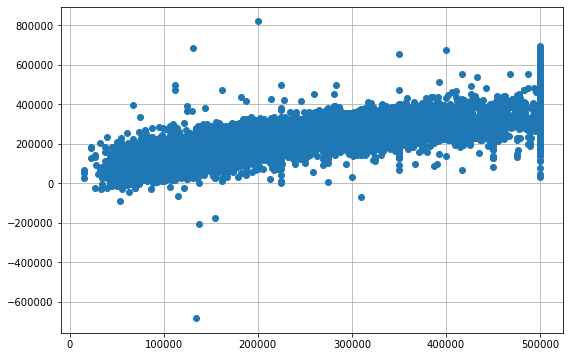

In [125]:
plt.figure(figsize=(9,6))
plt.grid('both')
plt.plot(y_train,y_hat_train,"o")
plt.show()

In [127]:
from sklearn.metrics import r2_score

In [128]:
r2_score(y_train,y_hat_train)

0.6481553632426749

### predict values for test data

In [129]:
x_test = test_arr
y_test = np.array(test_df.median_house_value)

In [130]:
y_hat_test = lr.predict(x_test)

In [131]:
y_hat_test

array([424329.00195312, 290943.11914062, 242612.65820312, ...,
       309894.46484375, 266771.63476562, 238678.12109375])

In [132]:
import matplotlib.pyplot as plt

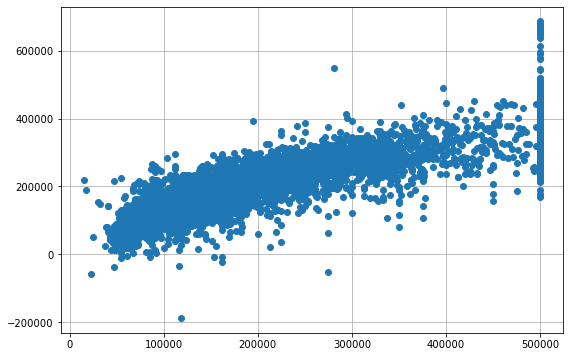

In [133]:
plt.figure(figsize=(9,6))
plt.grid('both')
plt.plot(y_test,y_hat_test,"o")
plt.show()

In [134]:
r2_score(y_test,y_hat_test)

0.6564598326458873

## DECISION TREE REGRESSOR

In [135]:
from sklearn.tree import DecisionTreeRegressor

In [136]:
reg_dt = DecisionTreeRegressor()

In [137]:
reg_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [140]:
y_hat_test = reg_dt.predict(x_test)

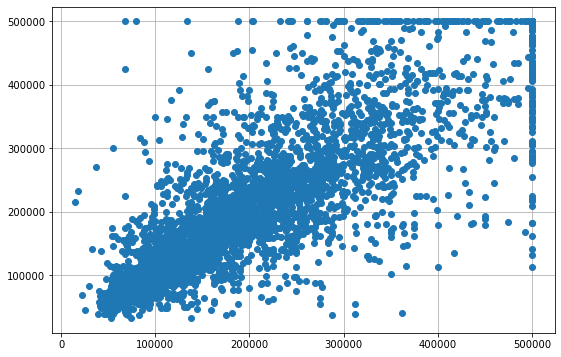

In [141]:
plt.figure(figsize=(9,6))
plt.grid('both')
plt.plot(y_test,y_hat_test,"o")
plt.show()

In [142]:
r2_score(y_test,y_hat_test)

0.628073373863411

## RIDGE, LASSO, ELASTICNET REGRESSION

In [153]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

In [144]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

d:\ineuron\ML Modular Projects\ML-Project\venv\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.59045e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [149]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 35}
-4769678474.2201


In [150]:
y_hat_test = ridge_regressor.predict(x_test)

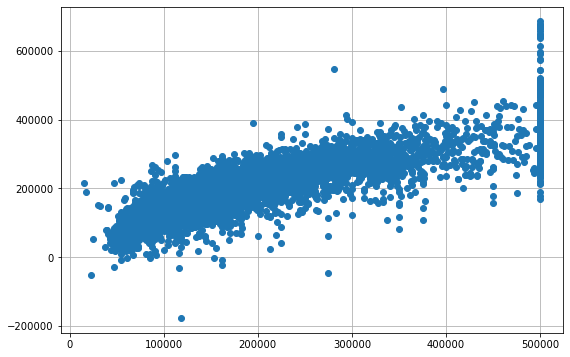

In [151]:
plt.figure(figsize=(9,6))
plt.grid('both')
plt.plot(y_test,y_hat_test,"o")
plt.show()

In [152]:
r2_score(y_test, y_hat_test)

0.6564390786457892

In [157]:
lasso=Lasso()
parameters={'alpha':[1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5,verbose=0)
lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

d:\ineuron\ML Modular Projects\ML-Project\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.948e+12, tolerance: 1.772e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
d:\ineuron\ML Modular Projects\ML-Project\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.991e+12, tolerance: 1.773e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
d:\ineuron\ML Modular Projects\ML-Project\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of

{'alpha': 100}
-4767214961.60409


In [158]:
y_hat_test = lasso_regressor.predict(x_test)

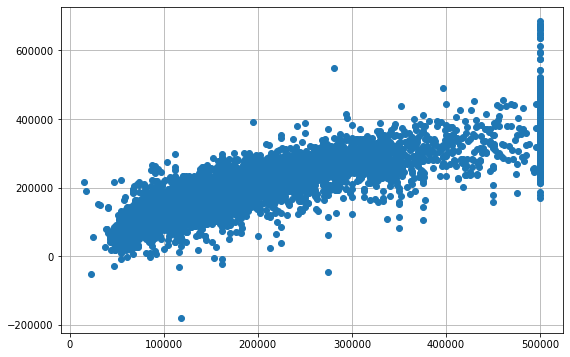

In [159]:
plt.figure(figsize=(9,6))
plt.grid('both')
plt.plot(y_test,y_hat_test,"o")
plt.show()

In [160]:
r2_score(y_test,y_hat_test)

0.6564002948745227

In [162]:
elasticnet = ElasticNet()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
en_regressor = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error',cv=5,verbose=1)
en_regressor.fit(x_train,y_train)
print(en_regressor.best_params_)
print(en_regressor.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


d:\ineuron\ML Modular Projects\ML-Project\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.126e+13, tolerance: 1.772e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
d:\ineuron\ML Modular Projects\ML-Project\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.134e+13, tolerance: 1.773e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
d:\ineuron\ML Modular Projects\ML-Project\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of

{'alpha': 0.01}
-4770650310.088631


d:\ineuron\ML Modular Projects\ML-Project\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+11, tolerance: 2.210e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [163]:
y_hat_test = en_regressor.predict(x_test)

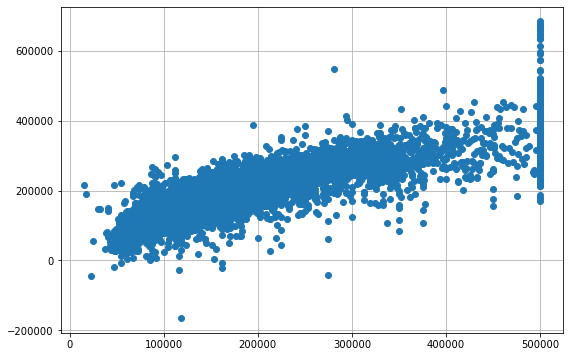

In [164]:
plt.figure(figsize=(9,6))
plt.grid('both')
plt.plot(y_test,y_hat_test,"o")
plt.show()

In [165]:
r2_score(y_test,y_hat_test)

0.6561873698734425

## RANDOM FOREST REGRESSOR

In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
reg_rf = RandomForestRegressor()

In [168]:
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [169]:
y_hat_test = reg_rf.predict(x_test)

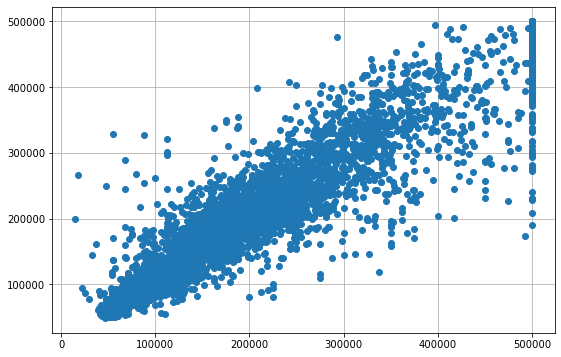

In [170]:
plt.figure(figsize=(9,6))
plt.grid('both')
plt.plot(y_test,y_hat_test,"o")
plt.show()

In [171]:
r2_score(y_test,y_hat_test)

0.8210849678482766